In [1]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random
import numpy as np
from src.gameSimulation.GameUr import GameUr, Player, Dice, GameSettings
import src.gameSimulation.Strategies as Strategies
import src.gameSimulation.Multirun as Multirun
import gameBoardDisplay as gbd

from scipy import stats


%config InlineBackend.figure_formats = ['svg']
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.collections as collections
import matplotlib.patches as mpatches


mplstyle.use('fast')
mplstyle.use('default')
mpl.rcParams['figure.figsize'] = [10, 20]

colors = ["lightgreen", "yellow", "red"]
cmap = LinearSegmentedColormap.from_list("mycmap", colors)


In [2]:
rs = Strategies.RandomStrategy()
mfs = Strategies.MoveFirstStrategy()
mls = Strategies.MoveLastStrategy()
p0 = Player(0, 7, mls)
p1 = Player(1, 7, mfs)
p2 = Player(2, 7, mfs)
# p3 = Player(3, 4, rs)
md2 = Dice.MultiD2Dice(4)
d4 = Dice.D4()
# gs = GameSettings([p0,p1],d,4,8,2,[8],[4,8,13],exactFinish=False)
gs0 = GameSettings([p0, p1], md2, 4, 8, 2, [8], [4, 8, 13])


In [3]:
print(*list(gs0.getFieldsSettings().values())[3:5])


[8] [4, 8, 13]


[0 0]


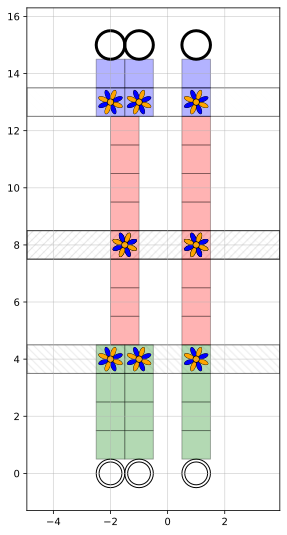

In [4]:

# xy = np.array((-2.,   7.5)) + (.5, .5)
xy = np.array((0,0))
offset = np.array((.1, .1))

fco = "orange"
fcb = "blue"
print(xy)
ax = plt.subplot(222)
gbd.makeGameboardDisplay(ax, *list(gs0.getFieldsSettings().values()), xoff=2,singleRow=False)
gbd.makeGameboardDisplay(ax, *list(gs0.getFieldsSettings().values()), xoff=-0.5)



# for p in starpatches(xy-(.5, .5)):
#     ax.add_patch(p)



# rect = mpatches.Rectangle(xy-(.5,.5), 1, 1, fill=None)
# ax.add_patch(rect)

ax.set_ybound(7.5, 8.5)
ax.set_xlim(7.5, 18.5)
ax.axis("equal")
ax.grid(True, alpha=0.5)


plt.show()


In [5]:
for direction in range(0, 4):
    coordSign = (-1 if direction in (1, 2) else 1,1)
    coordVal = (1 if direction in (0, 3) else 2.5,
                1 if direction in (1, 2) else 2.5)
    color = fcb if direction in [1,2] else fco
    
    pos = xy + offset * (1, 1) * coordSign * coordVal
    print(direction, pos, color)
    




0 [0.1  0.25] orange
1 [-0.25  0.1 ] blue
2 [-0.25  0.1 ] blue
3 [0.1  0.25] orange
